# Hands-on Machine Learning with Python (8th Sep 2018)

<hr />

## 0) Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np

<hr />

## 1) Get the Data
### 1.2) Loading data

In [2]:
bankdata = pd.read_csv("bank.csv", na_values=["unknown"], sep=";")
# bankdata = pd.read_csv("bank.csv", sep=";")

### 1.3) Quick look at the data structure

In [3]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Getting shape and column names
print(bankdata.shape)
print(bankdata.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
bankdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Getting Categorical and Numerical variable list
cat_var = bankdata.dtypes.index[np.where(bankdata.dtypes == "object")].values.tolist()
num_var = bankdata.dtypes.index[np.where(bankdata.dtypes != "object")].values.tolist()

In [8]:
# Checking Value Counts for all the categorical variables

for var in cat_var:
    print("<================ %s ================>" % var)
    print(bankdata[var].value_counts())
    print("\n")

<================ job ================>
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


<================ marital ================>
married     24928
single      11568
divorced     4612
Name: marital, dtype: int64


<================ education ================>
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64


<================ default ================>
no     32588
yes        3
Name: default, dtype: int64


<================ housing ================>
yes    21576
no     18622
Name: housing, dtype: int64


<================ loan ================>
no     33950
yes     6248
Name:

In [9]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
# Few data transformation - 2
bankdata["education"] = np.where(bankdata["education"] == "basic.4y", "basic", bankdata["education"])
bankdata["education"] = np.where(bankdata["education"] == "basic.6y", "basic", bankdata["education"])
bankdata["education"] = np.where(bankdata["education"] == "basic.9y", "basic", bankdata["education"])

bankdata["education"].unique()

array(['basic', 'high.school', 'professional.course', nan,
       'university.degree', 'illiterate'], dtype=object)

### 1.4) Creating a test set

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bankdata, test_size = 0.1, random_state = 42)

In [12]:
# Checking yes-no proportion in train and test set
print("Train Data: Total Rows = %d; No = %d | Yes = %d" % (train_set.shape[0], train_set["y"].value_counts()[0], train_set["y"].value_counts()[1]))
print("Test Data: Total Rows = %d; No = %d | Yes = %d" % (test_set.shape[0], test_set["y"].value_counts()[0], test_set["y"].value_counts()[1]))

Train Data: Total Rows = 37069; No = 32891 | Yes = 4178
Test Data: Total Rows = 4119; No = 3657 | Yes = 462


<hr />

## 2) Data Exploration and Visualization

### 2.1) Data Exploration

In [13]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

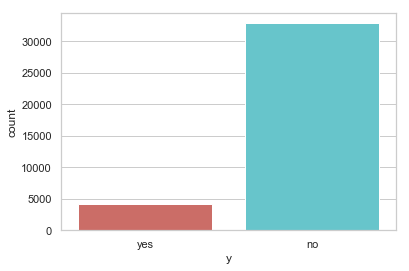

In [14]:
sns.countplot(data=train_set, palette="hls", x="y")

Let's get a sense of numbers across 2 classes

In [15]:
train_set.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.925086,220.621295,2.639415,984.270621,0.133015,0.247341,93.603389,-40.603113,3.809187,5176.119090
yes,40.849689,553.565582,2.040689,793.627812,0.489229,-1.229440,93.357558,-39.769076,2.126894,5095.064481


__Observations:__

- Average age of customer who bought term deposit is higher than that of customers who didn't.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

Let's check for other variables to sense the data

In [16]:
train_set.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.215784,253.455746,2.630419,954.687507,0.189158,0.015007,93.532628,-40.225977,3.550985,5164.079859
blue-collar,39.614618,265.336414,2.564930,986.015002,0.122660,0.243591,93.654651,-41.410358,3.764758,5175.461330
entrepreneur,41.787072,260.796958,2.539924,980.881369,0.138403,0.166464,93.609656,-41.306692,3.796056,5176.660989
housemaid,45.427975,250.575157,2.626305,963.749478,0.135699,0.464405,93.690930,-39.493737,4.040725,5180.425365
management,42.339969,257.838821,2.493874,961.725115,0.189127,-0.020521,93.524115,-40.510758,3.602392,5166.241807
retired,61.982569,273.722402,2.499677,897.686249,0.322143,-0.689025,93.437030,-38.596578,2.774706,5122.440542
self-employed,39.848345,264.514242,2.678984,976.049269,0.141647,0.098999,93.563647,-40.530485,3.694329,5170.968514
services,37.932185,256.612840,2.605336,978.840467,0.157588,0.166759,93.635230,-41.294497,3.687401,5171.061757
student,25.875158,283.683480,2.093317,840.052963,0.533417,-1.421311,93.320127,-40.085498,1.877773,5085.920807


In [17]:
train_set.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.986792,253.457253,2.630163,968.949808,0.172671,0.160807,93.610154,-40.724592,3.707926,5170.428194
married,42.311710,257.862798,2.571460,967.498057,0.155564,0.184024,93.597429,-40.277921,3.745991,5171.865992
single,33.158293,260.247966,2.544263,950.353909,0.210451,-0.169854,93.516076,-40.917351,3.315388,5155.200450


In [18]:
train_set.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic,42.165851,262.621586,2.564997,975.324406,0.141116,0.191289,93.640563,-40.962621,3.726795,5172.023401
high.school,38.051177,260.727720,2.575946,965.051880,0.185502,0.036163,93.586042,-40.949584,3.558753,5165.136445
illiterate,48.764706,266.000000,2.352941,940.588235,0.117647,-0.223529,93.309882,-40.176471,3.431412,5168.464706
professional.course,39.999575,254.198598,2.571580,960.637001,0.161427,0.175637,93.569847,-40.134388,3.712443,5170.229121
university.degree,38.859234,252.643448,2.571247,952.020642,0.193780,-0.033509,93.492699,-39.959634,3.525243,5162.947986


### 2.2) Data Visualization

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

#### i) Job Vs. Y

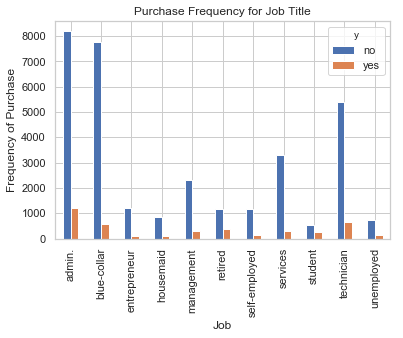

In [20]:
pd.crosstab(train_set.job, train_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

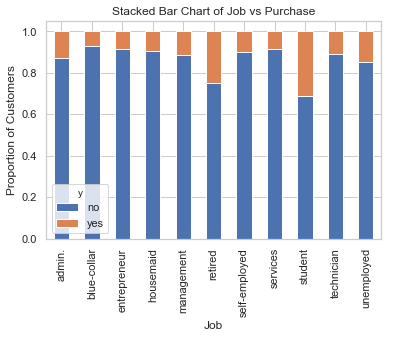

In [21]:
table=pd.crosstab(train_set.job, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
plt.savefig('Job_vs_pur_stack')

#### ii) Marital Vs. Y

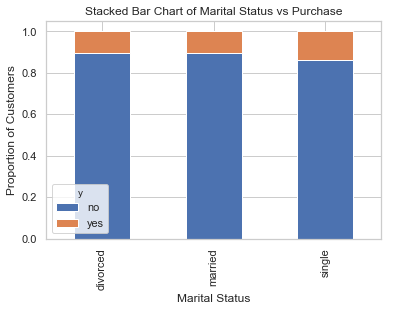

In [22]:
table=pd.crosstab(train_set.marital, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

#### iii) Education Vs. Y

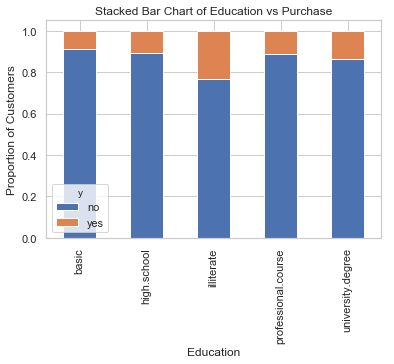

In [23]:
table=pd.crosstab(train_set.education, train_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

#### iv) day of week Vs. Y

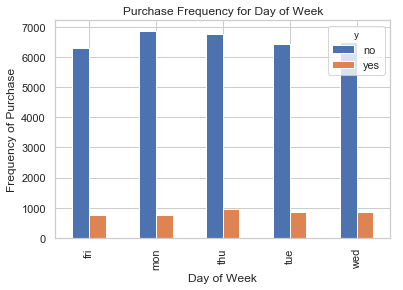

In [24]:
pd.crosstab(train_set.day_of_week, train_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

#### v) Month Vs. Y

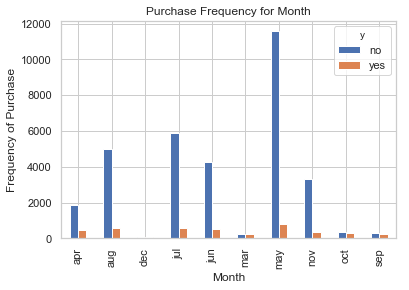

In [25]:
pd.crosstab(train_set.month, train_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

#### vi) poutcome Vs. Y

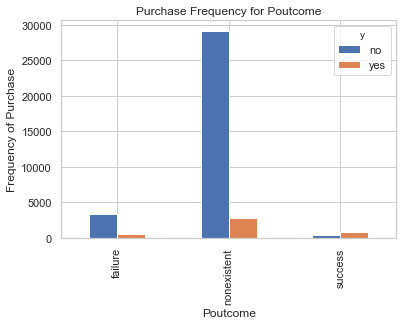

In [26]:
pd.crosstab(train_set.poutcome, train_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

#### vii) Age Histogram

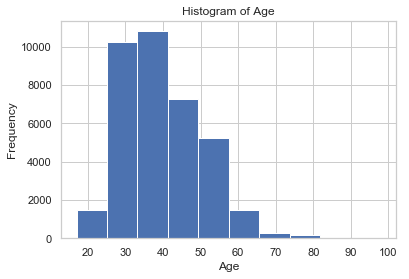

In [27]:
train_set.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

### 2.3) Correlation between numerical variables

In [28]:
train_set.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000937,0.006050,-0.035538,0.023071,0.000330,0.004263,0.127514,0.010965,-0.018315
duration,-0.000937,1.000000,-0.071551,-0.049429,0.020865,-0.028542,0.005049,-0.008468,-0.033517,-0.045201
campaign,0.006050,-0.071551,1.000000,0.051706,-0.079079,0.151471,0.128425,-0.013894,0.135762,0.144512
pdays,-0.035538,-0.049429,0.051706,1.000000,-0.584095,0.270969,0.079165,-0.093024,0.295974,0.371282
previous,0.023071,0.020865,-0.079079,-0.584095,1.000000,-0.421796,-0.205320,-0.053203,-0.455195,-0.500423
emp.var.rate,0.000330,-0.028542,0.151471,0.270969,-0.421796,1.000000,0.774298,0.195376,0.972212,0.906816
cons.price.idx,0.004263,0.005049,0.128425,0.079165,-0.205320,0.774298,1.000000,0.057305,0.686929,0.520290
cons.conf.idx,0.127514,-0.008468,-0.013894,-0.093024,-0.053203,0.195376,0.057305,1.000000,0.277259,0.100799
euribor3m,0.010965,-0.033517,0.135762,0.295974,-0.455195,0.972212,0.686929,0.277259,1.000000,0.945178
nr.employed,-0.018315,-0.045201,0.144512,0.371282,-0.500423,0.906816,0.520290,0.100799,0.945178,1.000000


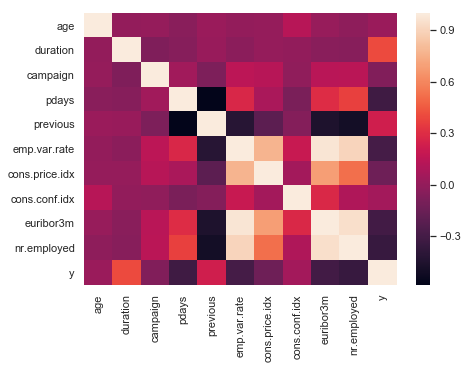

In [86]:
plt.subplots(figsize=(7, 5))
sns.heatmap(train_set.corr())

__Observation:__

- `euribor3m` and `nr.employed` are highly positive correlated (Remove one of the variable)

<hr />

## 3) Preparing data for ML Algorithms

### 3.1) Data Cleaning / Missing Value Treatment

#### Numerical Variable

There are no varibale to impute.

#### Categorical Variables

It can be seen that the variables `job`, `marital`, `education`, `default`, `housing` and `loan` have missing values.

In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 38651 to 15795
Data columns (total 21 columns):
age               37069 non-null int64
job               36774 non-null object
marital           36996 non-null object
education         35500 non-null object
default           29326 non-null object
housing           36172 non-null object
loan              36172 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory

In [31]:
train_set.marital.value_counts()

married     22383
single      10449
divorced     4164
Name: marital, dtype: int64

In [32]:
train_set["job"] = train_set["job"].fillna("admin.")
train_set["marital"] = train_set["marital"].fillna("married")
train_set["education"] = train_set["education"].fillna("university.degree")
train_set["default"] = train_set["default"].fillna("no")
train_set["housing"] = train_set["housing"].fillna("yes")
train_set["loan"] = train_set["loan"].fillna("no")

C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [33]:
train_set.marital.value_counts()

married     22456
single      10449
divorced     4164
Name: marital, dtype: int64

### 3.2) Handling Text and Categorical Attributes

In [38]:
train_set["y"] = np.where(train_set["y"]=="no", 0, 1)
cat_var.remove("y")

C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ValueError: list.remove(x): x not in list

In [39]:
train_set_ohe = pd.get_dummies(train_set[cat_var])

In [63]:
train_set_ohe

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38651,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
12733,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
35807,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1423,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
35099,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
274,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26357,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
37705,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13993,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### 3.3) Feature Scaling

it performs on the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221863DFA90>,
      dtype=object)

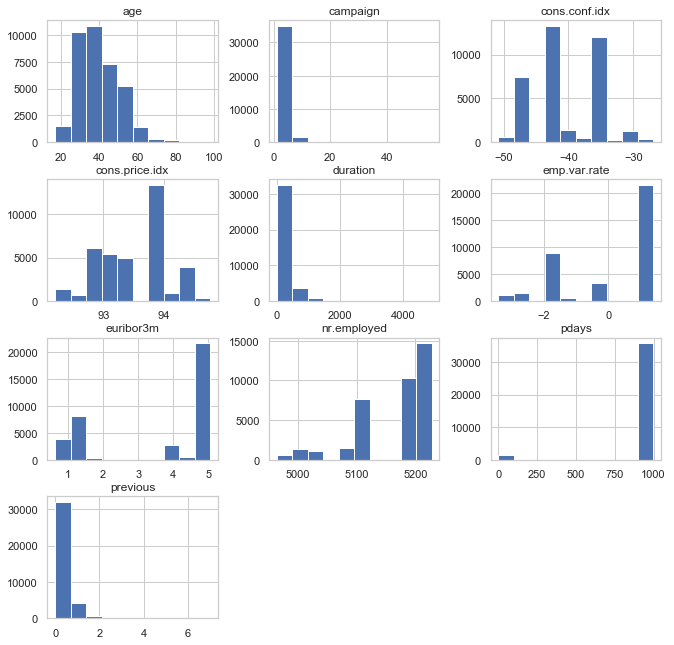

In [45]:
import matplotlib.pyplot as plt
train_set[num_var].hist(figsize = [11, 11])

Here we can see that all the numerical variables are at a different scale. Hence need to do the feature scaling.

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(train_set[num_var]))

,0,1,2,3,4,5,6,7,8,9
0,-1.727586,0.383926,-0.565628,0.194557,-0.350547,-2.214517,-1.600304,2.249856,-1.670788,-2.065579
1,1.147046,0.014814,-0.565628,0.194557,-0.350547,0.839204,0.591156,-0.473546,0.773527,0.844514
2,0.667940,2.671650,0.154031,0.194557,-0.350547,-1.196610,-1.178936,-1.230046,-1.368850,-0.938022
3,-0.194449,0.556947,-0.205798,0.194557,-0.350547,0.648346,0.722402,0.888155,0.711872,0.331862
4,1.913614,-0.019790,-0.565628,0.194557,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862
5,-1.344302,1.606609,0.154031,0.194557,-0.350547,-1.196610,-1.178936,-1.230046,-1.365393,-0.938022
6,0.859582,-0.569613,-0.205798,0.194557,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862
7,-0.769376,-0.212036,-0.565628,0.194557,-0.350547,-0.115084,-0.648772,-0.322245,0.262998,0.398189
8,-1.440123,-0.669580,-0.565628,0.194557,-0.350547,-1.896421,-2.373963,1.968870,-1.595304,-1.254457
9,-1.056839,-0.273554,-0.205798,0.194557,-0.350547,0.839204,0.591156,-0.473546,0.774104,0.844514


### 3.4) Transformation pipelines

In [55]:
from sklearn.pipeline import Pipeline

In [60]:
from sklearn.base import TransformerMixin
class DataFrameSelector(TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

#### Pipeline for Numerical Data

In [75]:
class num_var_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X)
        X.columns = num_var
        
        return X

num_pipeline = Pipeline([("selector", DataFrameSelector(num_var)),
                        ("standard_scaling", StandardScaler()),
                        ("extra_trans", num_var_trans())])

# num_pipeline = Pipeline([(), 
#                          (), 
#                          ()])

In [87]:
num_trans = num_pipeline.fit_transform(train_set)

#### Pipeline for Categorical Data

In [88]:
class cat_var_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, train_set):
        # Missing Value Imputation
        train_set["job"] = train_set["job"].fillna("admin.")
        train_set["marital"] = train_set["marital"].fillna("married")
        train_set["education"] = train_set["education"].fillna("university.degree")
        train_set["default"] = train_set["default"].fillna("no")
        train_set["housing"] = train_set["housing"].fillna("yes")
        train_set["loan"] = train_set["loan"].fillna("no")
        
        # One Hot Encoding
        XX = pd.get_dummies(train_set)
        
        return XX

cat_pipeline = Pipeline([("Selector", DataFrameSelector(cat_var)), 
                         ("Transformation", cat_var_trans())])

In [89]:
cat_trans = cat_pipeline.fit_transform(train_set)

C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [99]:
final_data = pd.concat([num_trans.reset_index(drop=True), cat_trans.reset_index(drop=True)], axis=1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.727586,0.383926,-0.565628,0.194557,-0.350547,-2.214517,-1.600304,2.249856,-1.670788,-2.065579,...,0,0,0,0,0,1,0,0,1,0
1,1.147046,0.014814,-0.565628,0.194557,-0.350547,0.839204,0.591156,-0.473546,0.773527,0.844514,...,0,0,0,0,0,1,0,0,1,0
2,0.667940,2.671650,0.154031,0.194557,-0.350547,-1.196610,-1.178936,-1.230046,-1.368850,-0.938022,...,0,0,0,1,0,0,0,0,1,0
3,-0.194449,0.556947,-0.205798,0.194557,-0.350547,0.648346,0.722402,0.888155,0.711872,0.331862,...,0,0,0,0,1,0,0,0,1,0
4,1.913614,-0.019790,-0.565628,0.194557,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862,...,0,0,0,1,0,0,0,0,1,0
5,-1.344302,1.606609,0.154031,0.194557,-0.350547,-1.196610,-1.178936,-1.230046,-1.365393,-0.938022,...,0,0,1,0,0,0,0,0,1,0
6,0.859582,-0.569613,-0.205798,0.194557,-0.350547,0.648346,0.722402,0.888155,0.713024,0.331862,...,0,0,0,1,0,0,0,0,1,0
7,-0.769376,-0.212036,-0.565628,0.194557,-0.350547,-0.115084,-0.648772,-0.322245,0.262998,0.398189,...,0,0,0,0,1,0,0,0,1,0
8,-1.440123,-0.669580,-0.565628,0.194557,-0.350547,-1.896421,-2.373963,1.968870,-1.595304,-1.254457,...,0,0,0,0,1,0,0,0,1,0
9,-1.056839,-0.273554,-0.205798,0.194557,-0.350547,0.839204,0.591156,-0.473546,0.774104,0.844514,...,0,0,1,0,0,0,0,0,1,0


In [110]:
def featureUnion(train_set):
    
    train_set["y"] = np.where(train_set["y"]=="no", 0, 1)
    y = train_set["y"].tolist()
    
    # Numerical Data Transformation
    num_trans = num_pipeline.fit_transform(train_set)
    
    # Categorical Data Transformation
    cat_trans = cat_pipeline.fit_transform(train_set)
    
    final_data = pd.concat([num_trans.reset_index(drop=True), cat_trans.reset_index(drop=True)], axis=1)
    
    return final_data, y
    

In [107]:
x_train, y_train = featureUnion(train_set)

C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\saura\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

<hr />

## 4) Train and Fine - Tuning the Model

### 4.1) Training and Evaluating on the training set

### 4.2) Better Evaluation using Cross-Validation

### 4.3) Finalizing the Model

### 4.4) Predicting the Test-set

In [ ]:
# Filtering X and Y
X_test = test_set.drop("y", axis=1) 
y_test = test_set["y"].copy()

# Preapring test data
X_test_prepared = full_pipeline.transform(X_test)

# Prediction
final_predictions = final_model.predict(X_test_prepared)

In [ ]:
# Validating the test set

<hr />

## Pack-up
### Dumping Everything

In [ ]:
from sklearn.externals import joblib

In [ ]:
complete_info = {"data": {"train": train, "test": test},
                "model": my_model}

In [ ]:
joblib.dump(complete_info, "Final_model.pkl")

### Loading into Python again

In [ ]:
complete_info_loaded = joblib.load("Final_model.pkl")